### Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### 1. Leitura e descrição dos dados

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

In [4]:
# Verificando tipos e presença de nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# Verificando a existência de duplicados
df.loc[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


### 2. Limpeza e Preparação dos dados

In [6]:
df["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [7]:
df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Será que esta é uma informação que vai agregar valor ao modelo?

**Tratamento de strings**

In [8]:
# plotar um gráfico aqui
temp = df.groupby('CarName').count()['car_ID']/df.groupby('CarName').count()['car_ID'].sum()*100
temp

CarName
Nissan versa                0.487805
alfa-romero Quadrifoglio    0.487805
alfa-romero giulia          0.487805
alfa-romero stelvio         0.487805
audi 100 ls                 0.487805
                              ...   
volvo 246                   0.487805
volvo 264gl                 0.975610
volvo diesel                0.487805
vw dasher                   0.487805
vw rabbit                   0.487805
Name: car_ID, Length: 147, dtype: float64

In [9]:
# Vamos extrair a informção mais importante
df['CarName'] = df['CarName'].apply(lambda x : x.split(' ')[0])
df["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
# transforma em minúsculas
df.CarName = df.CarName.str.lower()

def replace_name(a,b):
    df.CarName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [11]:
# plotar um gráfico aqui
(df.groupby('CarName').count()['car_ID']/df.groupby('CarName').count()['car_ID'].sum())*100

CarName
alfa-romero     1.463415
audi            3.414634
bmw             3.902439
buick           3.902439
chevrolet       1.463415
dodge           4.390244
honda           6.341463
isuzu           1.951220
jaguar          1.463415
mazda           8.292683
mercury         0.487805
mitsubishi      6.341463
nissan          8.780488
peugeot         5.365854
plymouth        3.414634
porsche         2.439024
renault         0.975610
saab            2.926829
subaru          5.853659
toyota         15.609756
volkswagen      5.853659
volvo           5.365854
Name: car_ID, dtype: float64

### 3. Análise Exploratória

In [62]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
categ_vars = ['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
              'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

#### 3.1 - Distribuição da variável resposta

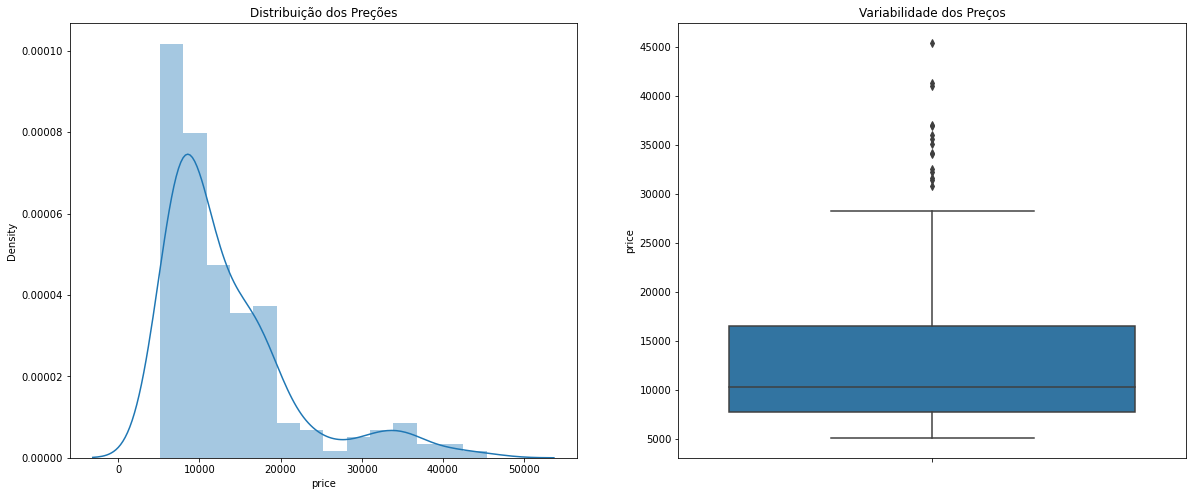

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribuição dos Preções')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Variabilidade dos Preços')
sns.boxplot(y=df.price)

plt.show()

#### 3.2 - Descrição das variáveis numéricas

In [14]:
df[num_vars].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<AxesSubplot:>

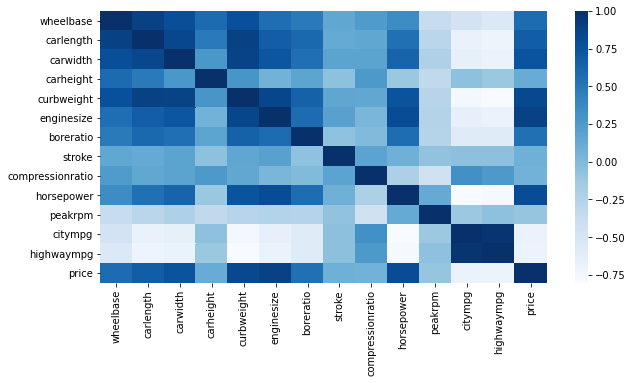

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df[num_vars].corr(),cmap="Blues")

<AxesSubplot:xlabel='stroke', ylabel='price'>

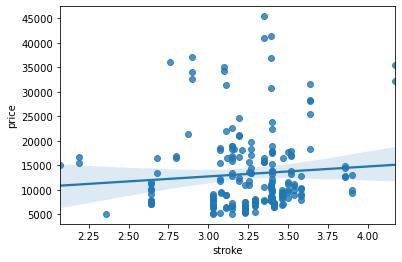

In [16]:
sns.regplot(df['stroke'], df['price'])

<AxesSubplot:xlabel='enginesize', ylabel='price'>

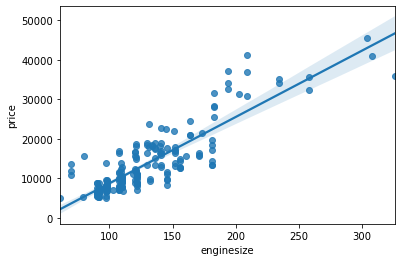

In [17]:
sns.regplot(df['enginesize'], df['price'])

#### 3.3 Descrição das variáveis categóricas

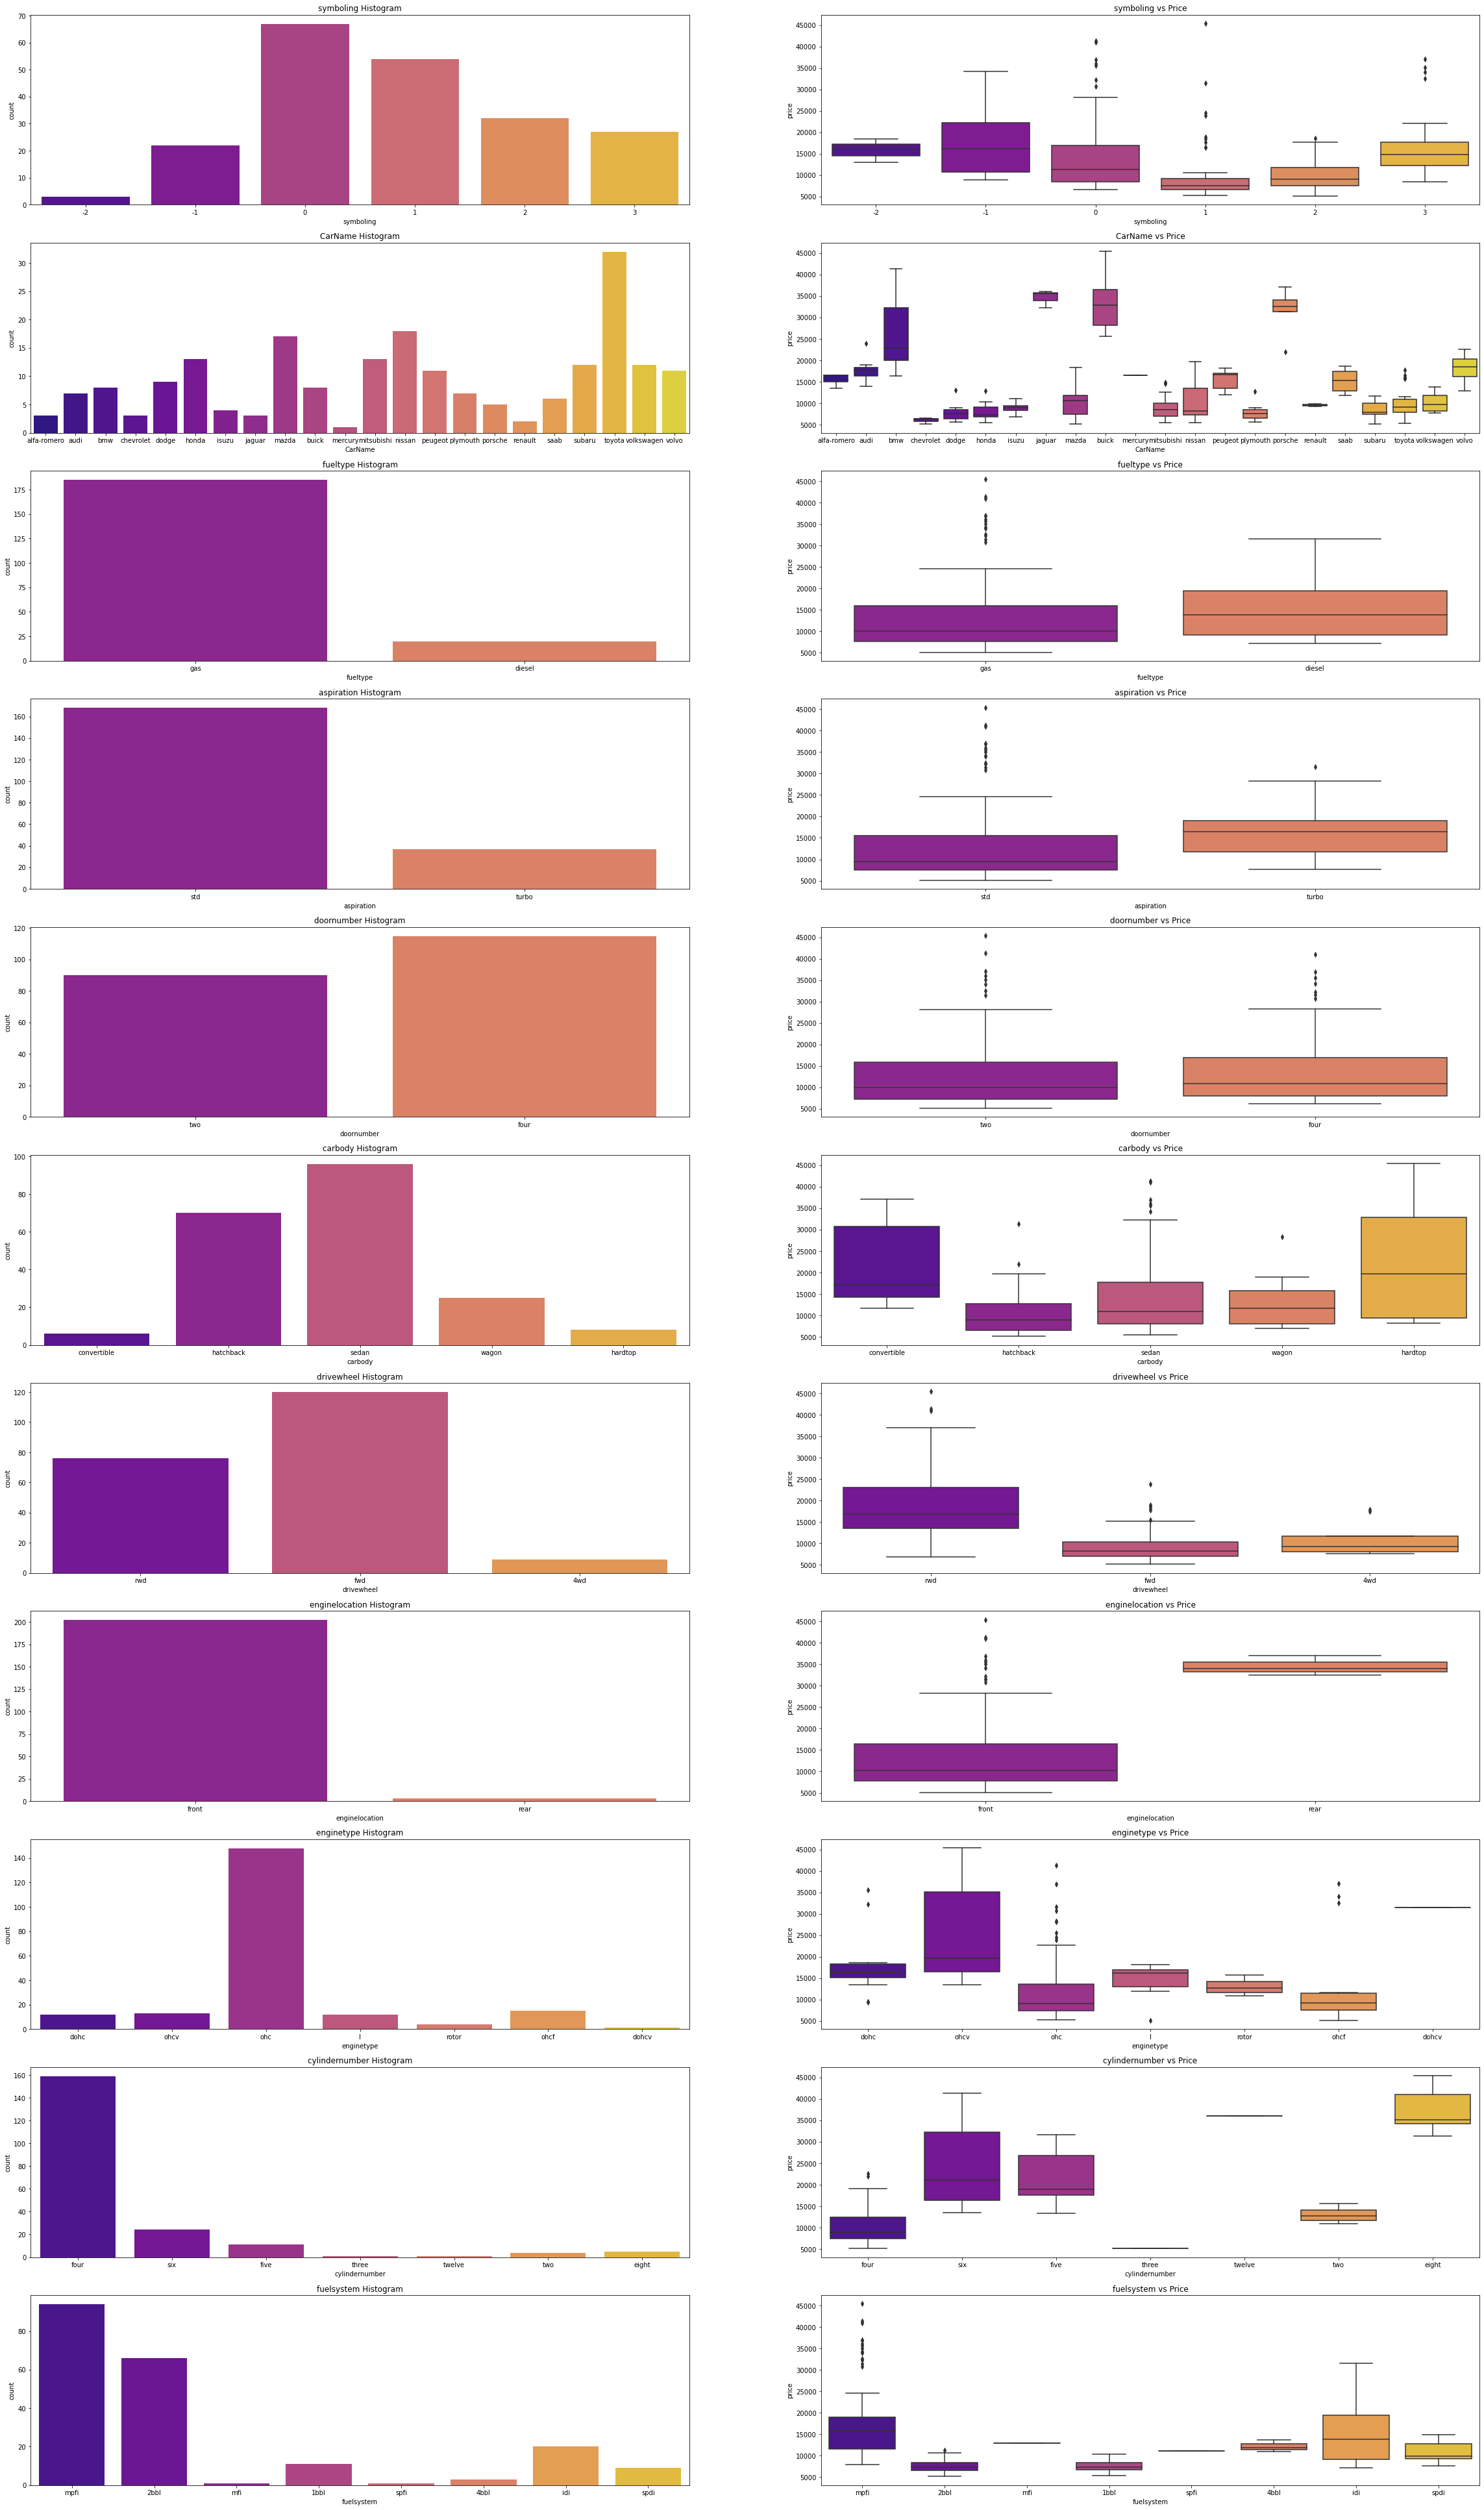

In [18]:
fig = plt.figure(figsize =(40, 70))

for i in range(len(categ_vars)):    
    plt.subplot(len(categ_vars),2,i*2+1)
    plt.title(categ_vars[i] + ' Histogram')
    sns.countplot(df[categ_vars[i]], palette=("plasma"))

    plt.subplot(len(categ_vars),2,i*2+2)
    plt.title(categ_vars[i]+' vs Price')
    sns.boxplot(x=df[categ_vars[i]], y=df.price, palette=("plasma"))
    
    
plt.show()

### 4. Engenharia de Features

Quando criamos variáveis baseada nas já existentes

In [19]:
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

In [20]:
df[num_vars].describe()['price']

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [21]:
df['classe_preco'] = np.where(
    df['price'] < 7788, 'Barato',
    (np.where((df['price'] >= 7888) & (df['price'] < 16503), 'Medio', 'Alto')))

In [22]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,classe_preco
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,Medio
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,Medio
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,Medio
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,Medio
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,Alto


### 5. Modelagem

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,scale
from sklearn import preprocessing

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### 5.1 - Modelo Naive

In [24]:
X = df.drop(['price'], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
print(X_train.shape, X_test.shape)

(164, 27) (41, 27)


In [25]:
scaler = StandardScaler()
X_train[num_vars[:-1]] = scaler.fit_transform(X_train[num_vars[:-1]])
X_test[num_vars[:-1]] = scaler.fit_transform(X_test[num_vars[:-1]])

In [26]:
encoders = []

for var in categ_vars+['classe_preco']:
    le = preprocessing.LabelEncoder()
    le.fit(df[var])
    encoders.append(le)
    X_train[var] = le.transform(X_train[var])
    X_test[var] = le.transform(X_test[var])

In [27]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
r2_score(y_test, y_pred)

0.8122207278533997

#### 5.2 - Modelo Naive + redução de variáveis

In [32]:
df_red = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
             'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio',
             'horsepower','carlength','carwidth', 'fueleconomy', 'classe_preco']]
df_red.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,fueleconomy,classe_preco
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,23.70,Medio
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,23.70,Medio
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5,22.15,Medio
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2,26.70,Medio
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4,19.80,Alto


In [48]:
X = df_red.drop('price', axis = 1)
y = df_red['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
print(X_train.shape, X_test.shape)

(164, 15) (41, 15)


In [49]:
num_vars_red = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 
            'horsepower','carlength','carwidth', 'fueleconomy']

scaler = StandardScaler()
X_train[num_vars_red[:-1]] = scaler.fit_transform(X_train[num_vars_red[:-1]])
X_test[num_vars_red[:-1]] = scaler.fit_transform(X_test[num_vars_red[:-1]])

In [50]:
encoders = []
categ_vars_red = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'classe_preco']

for var in categ_vars_red:
    le = preprocessing.LabelEncoder()
    le.fit(df[var])
    encoders.append(le)
    X_train[var] = le.transform(X_train[var])
    X_test[var] = le.transform(X_test[var])

In [51]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
r2_score(y_test, y_pred)

0.8420844098561808

#### Sem Redução com reg

In [85]:
from sklearn.feature_selection import RFE

In [100]:
X = df.drop(['price'], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
print(X_train.shape, X_test.shape)

(164, 27) (41, 27)


In [101]:
scaler = StandardScaler()
X_train[num_vars[:-1]] = scaler.fit_transform(X_train[num_vars[:-1]])
X_test[num_vars[:-1]] = scaler.fit_transform(X_test[num_vars[:-1]])

In [102]:
encoders = []
for var in categ_vars+['classe_preco']:
    le = preprocessing.LabelEncoder()
    le.fit(df[var])
    encoders.append(le)
    X_train[var] = le.transform(X_train[var])
    X_test[var] = le.transform(X_test[var])

In [106]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)
X_train.columns[rfe.support_]

Index(['fueltype', 'carbody', 'drivewheel', 'enginelocation', 'carlength',
       'carwidth', 'enginesize', 'peakrpm', 'citympg', 'classe_preco'],
      dtype='object')

In [107]:
new_columns = X_train.columns[rfe.support_]

lm = LinearRegression()
lm.fit(X_train[new_columns],y_train)
y_pred = lm.predict(X_test[new_columns])
r2_score(y_test, y_pred)

0.8578411128226657

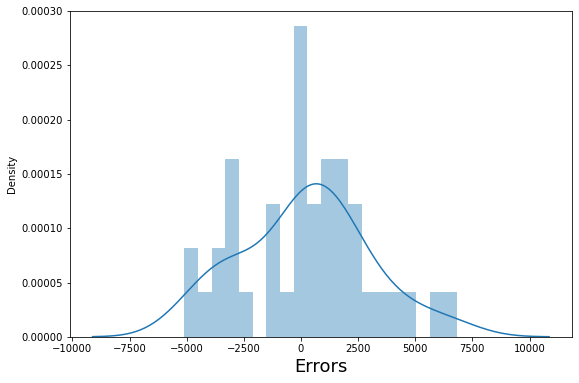

In [108]:
resid = (y_test - y_pred).to_frame('price')
fig = plt.figure(figsize=(9,6))
sns.distplot(resid, bins = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

### Nó 

In [75]:
X = df.drop(['price', 'classe_preco'], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
print(X_train.shape, X_test.shape)

(164, 26) (41, 26)


In [76]:
scaler = StandardScaler()
X_train[num_vars[:-1]] = scaler.fit_transform(X_train[num_vars[:-1]])
X_test[num_vars[:-1]] = scaler.fit_transform(X_test[num_vars[:-1]])

In [77]:
encoders = []

for var in categ_vars:#+['classe_preco']:
    le = preprocessing.LabelEncoder()
    le.fit(df[var])
    encoders.append(le)
    X_train[var] = le.transform(X_train[var])
    X_test[var] = le.transform(X_test[var])

In [78]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
r2_score(y_test, y_pred)

0.8525862202247348